# AI Lab Pratical3 : Reducion Noise Image and Smoothing Filter

## Introduction

In this section we will discuss on the fundamental filters and Machine Learning in order to noise enhancement for the real image. Now given that two noise images `noise1.tif` and `noise2.tif` from folder name `noise_image`

### 1. Convolutional Operation

Suppose that an image was device into $𝑀 × 𝑁$ pixels where represent the density as the function $𝑓(𝑥, 𝑦)$. We define the linear operation transformation neighborhood or convolutional operation $𝑇$ and the output $𝑔(𝑥, 𝑦)$ was given:

$g(x,y)=T[f(x,y)]=w*f=\sum^M_i \sum^N_j w(i,j)\cdot f(x+i,y+j)$

* $𝑤$: is an array with size $𝑚 × 𝑛$ defines the neighborhood of operation and was called kernel
* In common practice, the kernel $𝑤$ is defined as a square matrix of size $𝑛 × 𝑛$, such as $3 × 3$, $5 × 5$, and so on
* In this lab practical, we also introduce several filters in objective to fixed the noise image such as Mean Filter (Mean Kernel), Gaussian Filter (Gaussian kernel), Median Filter and application K-nearest neighbor in Machine Learning.

Now let’s discuss an image with array $4 × 4$ and given intensity value, mean kernel $2 × 2$ as illustrated bellow:

![Screenshot 2025-11-13 at 3.41.04 in the afternoon.png](<attachment:Screenshot 2025-11-13 at 3.41.04 in the afternoon.png>)
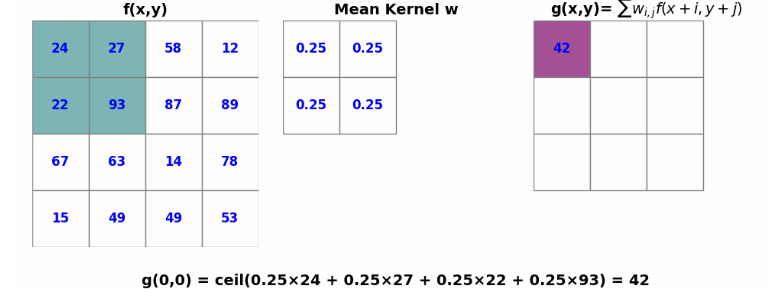

**Question 1:** If an image was size $64 × 64$ and kernel size $3 × 3$, what is the output size you will get? Could you give any techniques should be applied to get the same size of input and output?

In [1]:
# For a 64x64 image and a 3x3 kernel, using 'valid' convolution (no padding), the output size will be:
output_size = (64 - 3 + 1, 64 - 3 + 1)
print(f"Output size without padding: {output_size}")

# To keep the output size the same as the input (64x64), you should use 'same' convolution,
# which involves padding the input image with a border. For a 3x3 kernel, pad with 1 pixel on each side.
print("To keep the output size the same as the input, apply padding of 1 pixel on all sides before convolution.")

Output size without padding: (62, 62)
To keep the output size the same as the input, apply padding of 1 pixel on all sides before convolution.


**Question 2:** Create an input matrix named `in_matrix` with size $4 × 4$ and kernel name `kernel_matrix` for size $2 × 2$ from the value given in figure above. Programming to determine the output matrix name `out_matrix`.

In [2]:
import numpy as np

# Define the input matrix (from the figure in the markdown cell)
in_matrix = np.array([
    [2, 3, 0, 1],
    [1, 2, 1, 0],
    [0, 1, 3, 2],
    [1, 2, 2, 1]
])

# Define the kernel matrix (2x2 mean kernel)
kernel_matrix = np.array([
    [1, 1],
    [1, 1]
])

# Perform convolution (valid mode)
out_matrix = np.zeros((in_matrix.shape[0] - kernel_matrix.shape[0] + 1,
                       in_matrix.shape[1] - kernel_matrix.shape[1] + 1))

for i in range(out_matrix.shape[0]):
    for j in range(out_matrix.shape[1]):
        region = in_matrix[i:i+2, j:j+2]
        out_matrix[i, j] = np.sum(region * kernel_matrix)

print("Input matrix (in_matrix):\n", in_matrix)
print("Kernel matrix (kernel_matrix):\n", kernel_matrix)
print("Output matrix (out_matrix):\n", out_matrix)

Input matrix (in_matrix):
 [[2 3 0 1]
 [1 2 1 0]
 [0 1 3 2]
 [1 2 2 1]]
Kernel matrix (kernel_matrix):
 [[1 1]
 [1 1]]
Output matrix (out_matrix):
 [[8. 6. 2.]
 [4. 7. 6.]
 [4. 8. 8.]]


### 2. Mean Filter

Evaluate the noise reduction performance of two image were provided `noise1.tif` and `noise2.tif` with average filter $𝑤[𝑖, 𝑗]$ in dimension $3 × 3$ given by:

$w[i,j]=\frac{1}{9}\begin{bmatrix}1&1&1\\1&1&1\\1&1&1\end{bmatrix}$

Given a result and remake for kernel $𝑤[𝑖, 𝑗]$.

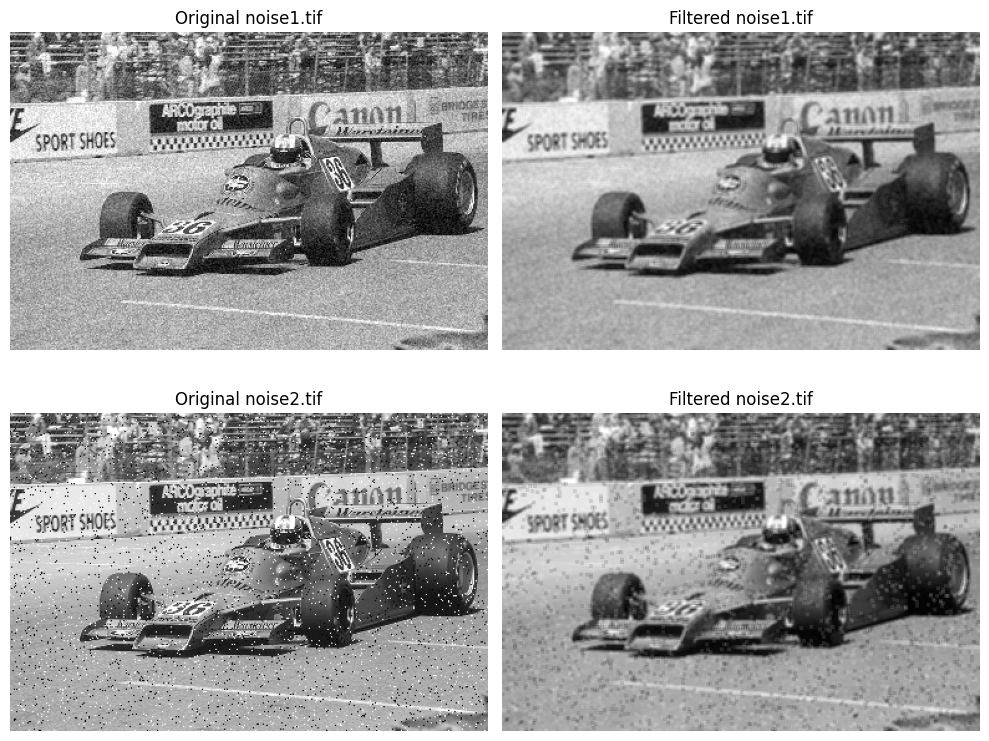

Mean filter kernel (w[i,j]):
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [3]:
import cv2

import matplotlib.pyplot as plt

# Define the 3x3 mean filter kernel
mean_kernel = np.ones((3, 3), dtype=np.float32) / 9

# Read the noisy images (ensure the path is correct)
img1 = cv2.imread('noise_image/noise1.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('noise_image/noise2.tif', cv2.IMREAD_GRAYSCALE)

# Apply mean filter using cv2.filter2D
img1_filtered = cv2.filter2D(img1, -1, mean_kernel)
img2_filtered = cv2.filter2D(img2, -1, mean_kernel)

# Display original and filtered images
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Original noise1.tif')
axs[0, 1].imshow(img1_filtered, cmap='gray')
axs[0, 1].set_title('Filtered noise1.tif')
axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('Original noise2.tif')
axs[1, 1].imshow(img2_filtered, cmap='gray')
axs[1, 1].set_title('Filtered noise2.tif')
for ax in axs.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()

print("Mean filter kernel (w[i,j]):\n", mean_kernel)

### 3. Gaussian Filter

In general Gaussian Filter has the form $w[i,j]=C  exp(-\frac{i^2+j^2}{2\sigma^2})$ where $\sigma^2$ known as the variance.

![Screenshot 2025-11-13 at 4.06.00 in the afternoon.png](<attachment:Screenshot 2025-11-13 at 4.06.00 in the afternoon.png>)
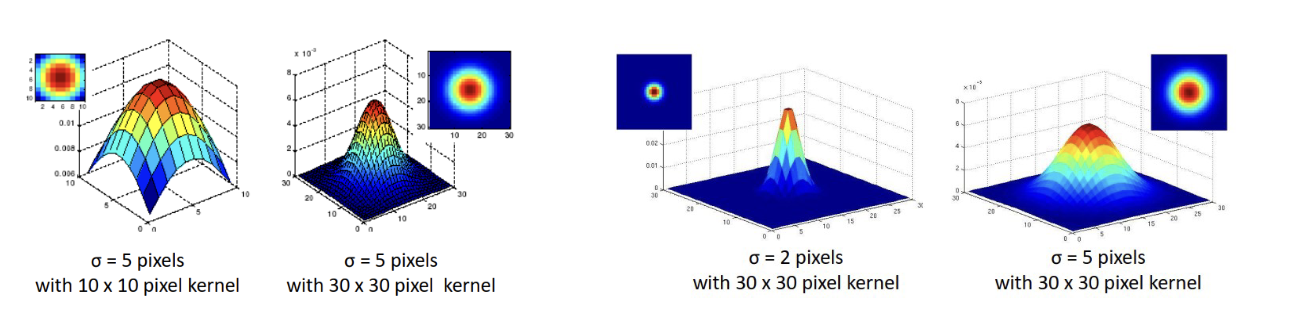

In this experiment, the noise reduction performance will be tested on two provided images `noise1.tif` and `noise2.tif`. The objective is to determine the optimal filter Gaussian $𝑤[𝑖, 𝑗]$ that effectively suppresses noise while preserving image details. For instance, of Gaussian Kernel $3 × 3$ express as form:

$w[i,j]=\frac{1}{16}\begin{bmatrix}1&2&1\\2&4&2\\1&2&1\end{bmatrix}$

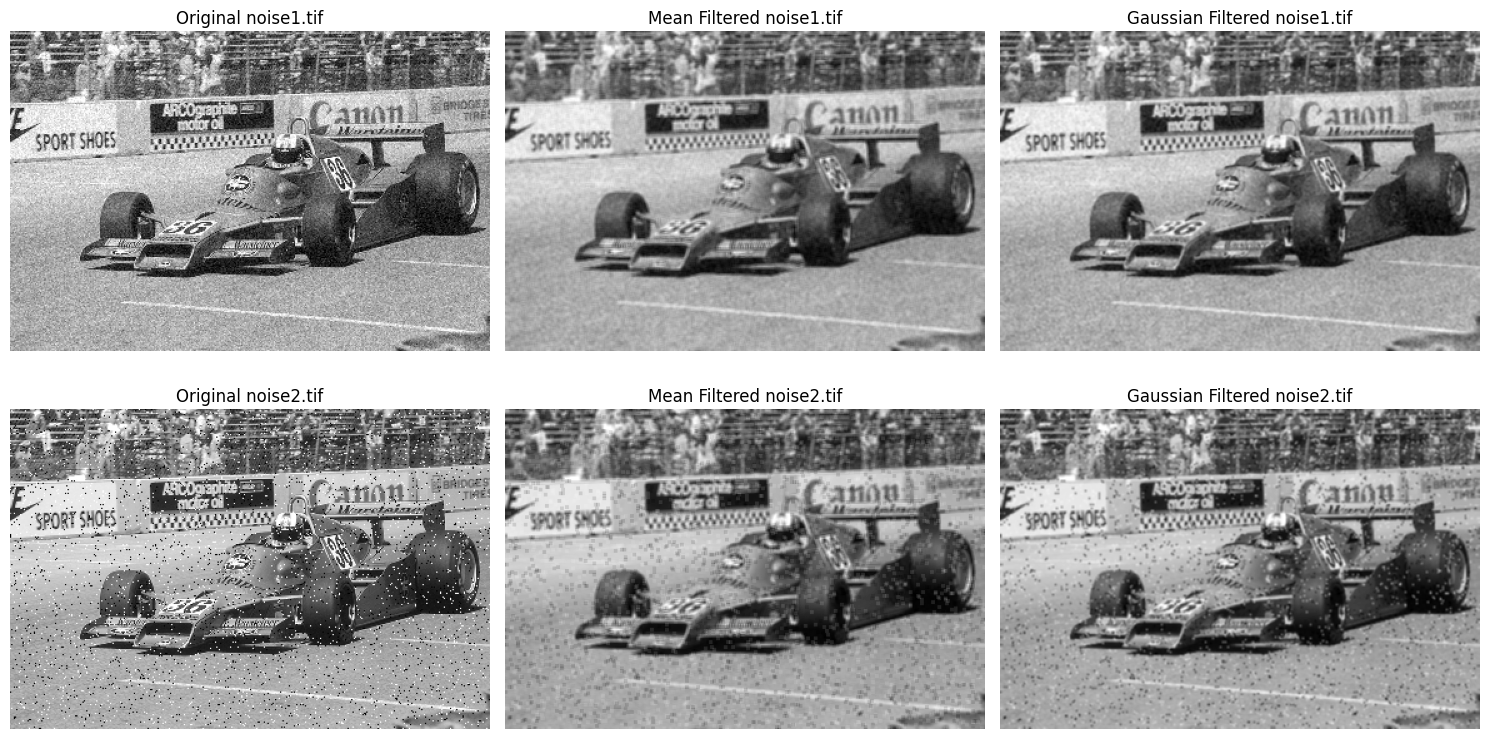

Gaussian filter kernel (gaussian_kernel):
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [4]:
# Define the 3x3 Gaussian kernel as given
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16

# Apply Gaussian filter to both noisy images
img1_gaussian = cv2.filter2D(img1, -1, gaussian_kernel)
img2_gaussian = cv2.filter2D(img2, -1, gaussian_kernel)

# Display original, mean-filtered, and Gaussian-filtered images for comparison
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Original noise1.tif')
axs[0, 1].imshow(img1_filtered, cmap='gray')
axs[0, 1].set_title('Mean Filtered noise1.tif')
axs[0, 2].imshow(img1_gaussian, cmap='gray')
axs[0, 2].set_title('Gaussian Filtered noise1.tif')

axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('Original noise2.tif')
axs[1, 1].imshow(img2_filtered, cmap='gray')
axs[1, 1].set_title('Mean Filtered noise2.tif')
axs[1, 2].imshow(img2_gaussian, cmap='gray')
axs[1, 2].set_title('Gaussian Filtered noise2.tif')

for ax in axs.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()

print("Gaussian filter kernel (gaussian_kernel):\n", gaussian_kernel)

### 4. Median Filter

In addition to the above linear filtering techniques, images can be smoothed by nonlinear filtering, such as mathematical morphological processing. Median filtering is one of the simplest morphological techniques, and is useful in the reduction of impulsive noise. For input image dimension $𝑀 × 𝑁$ with pixel value $𝑓(𝑥, 𝑦)$ and the output $𝑔(𝑥, 𝑦)$ given by: 

$𝑔(𝑥, 𝑦) = 𝑚𝑒𝑑𝑖𝑎𝑛(𝑓(𝑥 − 𝑖, 𝑦 − 𝑗)), (𝑖, 𝑗) ∈ 𝑀 × 𝑁$

Exploration median transform by determine the optimize size of kernel on two images given noise1.tif and noise2.tif and discuss this result.

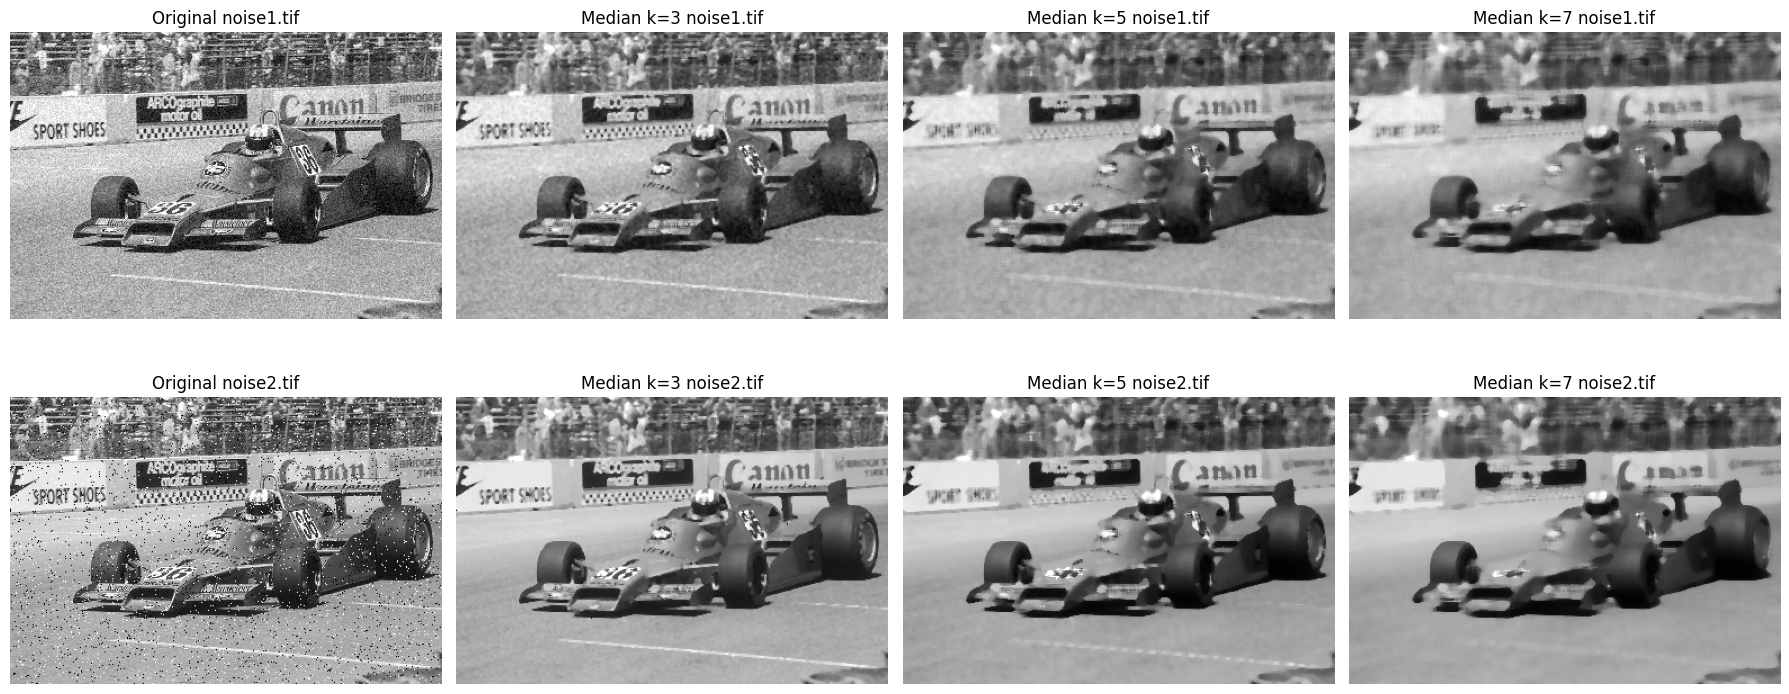

In [5]:
# Apply median filtering with different kernel sizes to both images
kernel_sizes = [3, 5, 7]

fig, axs = plt.subplots(2, len(kernel_sizes) + 1, figsize=(18, 8))

# Display original images
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Original noise1.tif')
axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('Original noise2.tif')

# Apply and display median filters
for idx, k in enumerate(kernel_sizes):
    img1_median = cv2.medianBlur(img1, k)
    img2_median = cv2.medianBlur(img2, k)
    axs[0, idx + 1].imshow(img1_median, cmap='gray')
    axs[0, idx + 1].set_title(f'Median k={k} noise1.tif')
    axs[1, idx + 1].imshow(img2_median, cmap='gray')
    axs[1, idx + 1].set_title(f'Median k={k} noise2.tif')

for ax in axs.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()